In [1]:
# Comparing ICA and PCA on data from a 2d uniform distribution
# Author : Aleyna Kara
# This file is based on https://github.com/probml/pmtk3/blob/master/demos/icaDemoUniform.m


from sklearn.decomposition import PCA, FastICA
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

try:
    from probml_utils import savefig, latexify, is_latexify_enabled
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify, is_latexify_enabled

In [2]:
latexify(width_scale_factor=2, fig_height=1.5)

/home/vishal/anaconda3/envs/pyprob/lib/python3.7/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


/home/vishal/anaconda3/envs/pyprob/lib/python3.7/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


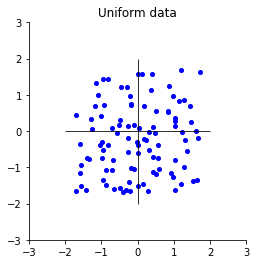

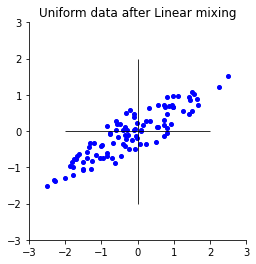

In [3]:
def plot_samples(S, title, file_name):
    min_x, max_x = -3, 3
    min_y, max_y = -3, 3
    s = 16
    if is_latexify_enabled():
        s = 5
        title = None
    plt.scatter(S[:, 0], S[:, 1], marker="o", s=s, color="b")
    plt.hlines(0, min_x + 1, max_x - 1, linewidth=0.8, color="black")
    plt.vlines(0, min_y + 1, max_y - 1, linewidth=0.8, color="black")
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    ax = plt.gca()
    ax.set_aspect("equal")
    plt.title(title)
    sns.despine()
    savefig(f"{file_name}")
    plt.show()


np.random.seed(2)
N = 100
A = np.array([[2, 3], [2, 1]]) * 0.3  # Mixing matrix

S_uni = (np.random.rand(N, 2) * 2 - 1) * np.sqrt(3)
X_uni = S_uni @ A.T

plot_samples(S_uni, "Uniform data", "ica-uniform-source")

plot_samples(X_uni, "Uniform data after Linear mixing", "ica-uniform-mixed")

/home/vishal/anaconda3/envs/pyprob/lib/python3.7/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


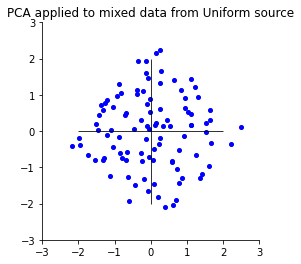

/home/vishal/anaconda3/envs/pyprob/lib/python3.7/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


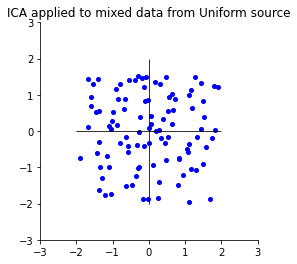

In [4]:
pca = PCA(whiten=True, random_state=13)
S_pca = pca.fit(X_uni).transform(X_uni)
plot_samples(S_pca, "PCA applied to mixed data from Uniform source", "ica-uniform-PCA")

ica = FastICA(random_state=13)
S_ica = ica.fit_transform(X_uni)
S_ica /= S_ica.std(axis=0)
plot_samples(S_ica, "ICA applied to mixed data from Uniform source", "ica-uniform-ICA")